In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [4]:
base_dir = os.getcwd()
exec_dir = '..'

## Construction 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.


In [17]:
sizes = [int(i/100*100000) for i in np.linspace(10,100,num=10)]

In [18]:
# Create slices of the original data set.
df = pd.read_csv('{}/data/crash_data.csv'.format(base_dir))
for s in sizes:
    part = df.head(s)
    part.to_csv('{}/test_construction/crash_data_{}.csv'.format(base_dir, s), index=False)

In [19]:
# Test the implementation.

capacity = 10
ntrials = 10
output_file = '{}/test_construction/test_construction.csv'.format(base_dir)

f = open(output_file, 'w')

os.chdir(exec_dir)

for m in sizes:
    if (m == 0): 
        continue
    print('Testing m={}...'.format(m))
    input_file = "{}/test_construction/crash_data_{}.csv".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

Testing m=10000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7294.7
Testing m=20000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_20000.csv
15928.2
Testing m=30000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_30000.csv
23486.2
Testing m=40000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_40000.csv
32983.6
Testing m=50000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
41408.5
Testing m=60000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_60000.csv
50666.3
Testing m=70000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_70000.csv
55979.5
Testing m=80000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_80000.csv
63706.1
Testing m=90000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_90000.csv
73426.9
Testing m=100000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_dat

In [20]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,10000,7.295
1,20000,15.928
2,30000,23.486
3,40000,32.984
4,50000,41.408
5,60000,50.666
6,70000,55.980
7,80000,63.706
8,90000,73.427
9,100000,86.293


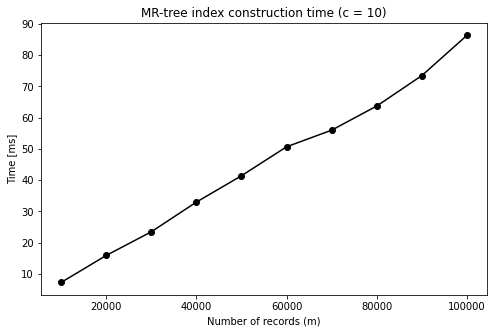

In [23]:
# Generate a plot.
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time (c = 10)")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
#plt.plot([x for x in range(100, 100000)], 
#         [15*np.log2(x) for x in range(100, 100000)], color='black', linestyle=':')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test_construction_m.png".format(base_dir), dpi=170, format='png', bbox_inches='tight')